In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import tensorflow as tf
import os

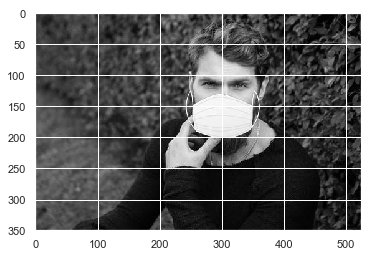

In [2]:
import cv2
dataset = r'C:\Users\pc\Desktop\mast detection\face_detector-master\data123'
categories = ['with_mask','without_mask']
for category in categories:
  path = os.path.join(dataset,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

In [3]:
img_array.shape

(350, 525)

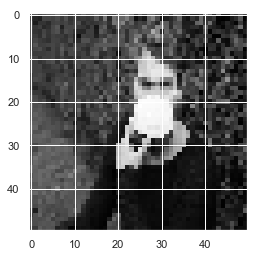

In [4]:
img_size = 50
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(dataset,category)
    class_num = categories.index(category)
    try:
      for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array , (img_size , img_size))
        training_data.append([new_array , class_num])
    except Exception as e:
      pass
          
create_training_data()

In [6]:
import random
random.shuffle(training_data)

In [7]:
X=[]
y=[]
for features,label in training_data:
  X.append(features)
  y.append(label)
X  = np.array(X).reshape(-1,img_size,img_size,1)
y = np.array(y)

In [8]:
import pickle
pickle_out = open('X_pickle' , 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open('y_pickle' , 'wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [9]:
pickle_in = open('X_pickle' , 'rb')
X = pickle.load(pickle_in)
pickle_in = open('y_pickle' , 'rb')
y = pickle.load(pickle_in)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation , MaxPooling2D
from tensorflow.keras.layers import Flatten , Dense
X = X/255.0
model = Sequential()
model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)



Train on 1420 samples, validate on 158 samples
Epoch 1/20
1420/1420 [==============================] - 12s 9ms/step - loss: 0.6368 - acc: 0.6176 - val_loss: 0.5616 - val_acc: 0.6835
Epoch 2/20
1420/1420 [==============================] - 11s 8ms/step - loss: 0.4041 - acc: 0.8268 - val_loss: 0.3770 - val_acc: 0.7975
Epoch 3/20
1420/1420 [==============================] - 11s 7ms/step - loss: 0.2609 - acc: 0.8901 - val_loss: 0.2526 - val_acc: 0.8924
Epoch 4/20
1420/1420 [==============================] - 11s 8ms/step - loss: 0.1973 - acc: 0.9232 - val_loss: 0.2779 - val_acc: 0.8797
Epoch 5/20
1420/1420 [==============================] - 11s 8ms/step - loss: 0.2142 - acc: 0.9099 - val_loss: 0.2551 - val_acc: 0.8924
Epoch 6/20
1420/1420 [==============================] - 11s 8ms/step - loss: 0.1573 - acc: 0.9430 - val_loss: 0.2239 - val_acc: 0.8987
Epoch 7/20
1420/1420 [==============================] - 11s 8ms/step - loss: 0.1531 - acc: 0.9394 - val_loss: 0.2171 - val_acc: 0.8924
Epoch 8/

In [14]:
model.save(r'C:\Users\pc\Desktop\mast detection\mask_detection.h5')

In [16]:
import cv2
import tensorflow as tf

categories = ['with_mask','without_mask']


def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model(r"C:\Users\pc\Desktop\mast detection\mask_detection.h5")

prediction = model.predict([prepare(r'C:\Users\pc\Desktop\mast detection\face_detector-master\data123\without_mask\1.jpg')])
print(prediction)  # will be a list in a list.
print(categories[int(prediction[0][0])])

[[1.]]
without_mask


In [12]:
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
import h5py
def prepare(filepath):
    IMG_SIZE = 50  
    new_array = cv2.resize(filepath, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import cv2
cap = cv2.VideoCapture(0)
categories = ['with_mask','without_mask']
if not (cap.isOpened()):
    print ('Enable to open')
haar_cascade_face = cv2.CascadeClassifier(r'C:\Users\pc\Desktop\OPENCV\face\haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
model = load_model(r'C:\Users\pc\Desktop\mast detection\mask_detection.h5')
while(True):
    ret,frame = cap.read()
    faces_rects = haar_cascade_face.detectMultiScale(frame, scaleFactor = 1.2, minNeighbors = 5)
    
    prediction = model.predict([prepare(frame)])
    pred = categories[int(prediction[0][0])]
    
    for (x,y,w,h) in faces_rects:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame,str(pred),(20,50),font,1,(255,0,0),3)
    cv2.imshow('test',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()